Loading various libraries

In [1]:
import re
import string

import numpy as np
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize  
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report 


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing the 20newsgroup training data

In [2]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
# mydata_train = fetch_20newsgroups(subset='train', shuffle=True)
mydata_train = fetch_20newsgroups(subset='train', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [3]:
print('Training data size:', len(mydata_train['data']))

Training data size: 11314


In [4]:
len(mydata_train['target'])

11314

In [5]:
# Printing all the categories
mydata_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
# Finding frequency of each category
targets, frequency = np.unique(mydata_train.target, return_counts=True)
targets, frequency 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377], dtype=int64))

In [7]:
targets_str = np.array(mydata_train.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


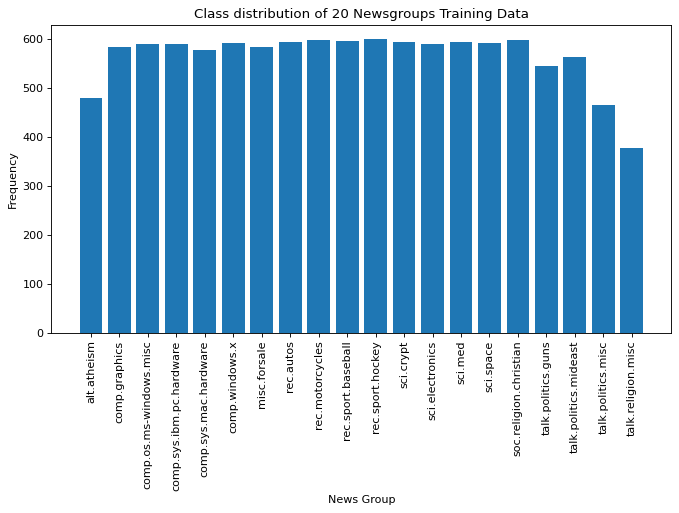

In [8]:
# Training data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

We can see that there are sufficient samples in each category and that there isn't a lot of imbalance.

Importing the 20newsgroup test data

In [9]:
# mydata_test = fetch_20newsgroups(subset='test', shuffle=True)
mydata_test = fetch_20newsgroups(subset='test', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [10]:
print('Testing data size:', len(mydata_test['data']))

Testing data size: 7532


In [14]:
# Finding frequency of each category
targets_test, frequency_test = np.unique(mydata_test.target, return_counts=True)
targets_test_str = np.array(mydata_test.target_names)
print(list(zip(targets_test_str, frequency_test)))

[('alt.atheism', 319), ('comp.graphics', 389), ('comp.os.ms-windows.misc', 394), ('comp.sys.ibm.pc.hardware', 392), ('comp.sys.mac.hardware', 385), ('comp.windows.x', 395), ('misc.forsale', 390), ('rec.autos', 396), ('rec.motorcycles', 398), ('rec.sport.baseball', 397), ('rec.sport.hockey', 399), ('sci.crypt', 396), ('sci.electronics', 393), ('sci.med', 396), ('sci.space', 394), ('soc.religion.christian', 398), ('talk.politics.guns', 364), ('talk.politics.mideast', 376), ('talk.politics.misc', 310), ('talk.religion.misc', 251)]


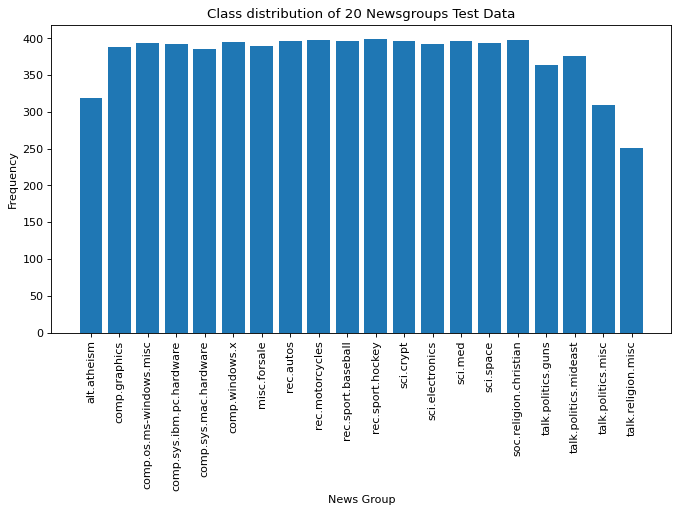

In [15]:
# Testing data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_test_str,frequency_test)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

Data Preparation:

We will perform preparation steps such as Tokenization, Convert everything to lowercase, Removing stopwords, Stemming, Lemmatizing, and converting text data to a vector representation

In [16]:
mydata_train_df = pd.DataFrame({'data': mydata_train.data, 'target': mydata_train.target})
mydata_train_df.head()

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [17]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_train_df['data'] = mydata_train_df.data.map(alphanumeric).map(punc_lower)
mydata_train_df.head()

,data,target
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gh...,4
3,\ndo you have weitek s address phone number ...,1
4,from article world std com by tombaker ...,14


In [18]:
# Preparing test data
mydata_test_df = pd.DataFrame({'data': mydata_test.data, 'target': mydata_test.target})
mydata_test_df.head()

,data,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19


In [19]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_test_df['data'] = mydata_test_df.data.map(alphanumeric).map(punc_lower)
mydata_test_df.head()

,data,target
0,i am a little confused on all of the models of...,7
1,i m not familiar at all with the format of the...,5
2,\nin a word yes \n,0
3,\nthey were attacking the iraqis to drive them...,17
4,\ni ve just spent two solid months arguing tha...,19


Count Vectorizer

In [20]:
count_vect = CountVectorizer(stop_words='english')

X_train_cv = count_vect.fit_transform(mydata_train_df.data)  # fit_transform learns the vocab and one-hot encodes
y_train = mydata_train_df.target
X_test_cv = count_vect.transform(mydata_test_df.data) # transform uses the same vocab and one-hot encodes
y_test = mydata_test_df.target

print(X_train_cv.shape)
print(type(X_train_cv))

(11314, 67822)
<class 'scipy.sparse._csr.csr_matrix'>


TF-IDF Vectorizer

In [27]:
# Creating a document-term matrix using TF-IDF

tfidfV = TfidfVectorizer(stop_words='english') 
# tfidfV = TfidfVectorizer(ngram_range=(1, 2), binary =True, stop_words='english') 

X_train_tfidfV = tfidfV.fit_transform(mydata_train_df.data) # fit_transform learns the vocab and one-hot encodes 
X_test_tfidfV = tfidfV.transform(mydata_test_df.data) # transform uses the same vocab and one-hot encodes 

# print the dimensions of the training set (text messages, terms) 
print(X_train_tfidfV.shape)
print(type(X_train_tfidfV))

(11314, 67822)
<class 'scipy.sparse._csr.csr_matrix'>


Classification Model

In [30]:
%%time
# Use a Naive Bayes model 
from sklearn.naive_bayes import MultinomialNB 

mnb = MultinomialNB() 

# Train the model 
mnb.fit(X_train_cv, y_train)

CPU times: total: 78.1 ms
Wall time: 59.1 ms


MultinomialNB()

In [31]:
# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv data 
y_pred_cv_mnb = mnb.predict(X_test_cv) 
y_pred_cv_mnb # The output is all of the predictions

array([ 7,  1, 15, ..., 15,  3, 15])

In [32]:
from sklearn.metrics import classification_report, accuracy_score

y_test = mydata_test_df.target
print(accuracy_score(y_test, y_pred_cv_mnb))
print(classification_report(y_test, y_pred_cv_mnb))

0.6399362719065321
              precision    recall  f1-score   support

           0       0.60      0.36      0.45       319
           1       0.57      0.70      0.63       389
           2       0.67      0.01      0.02       394
           3       0.50      0.71      0.58       392
           4       0.72      0.58      0.64       385
           5       0.58      0.80      0.67       395
           6       0.85      0.66      0.75       390
           7       0.82      0.70      0.76       396
           8       0.90      0.65      0.75       398
           9       0.93      0.76      0.84       397
          10       0.58      0.92      0.71       399
          11       0.58      0.78      0.66       396
          12       0.67      0.49      0.57       393
          13       0.83      0.79      0.81       396
          14       0.76      0.75      0.76       394
          15       0.48      0.90      0.63       398
          16       0.55      0.65      0.60       364
        

In [21]:
!pip install ktrain


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
%reload_ext autoreload
%autoreload 2 
import os 
os.environ["CUDA_DEVICE_ORDER'"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [23]:
!pip install tensorflow
import ktrain
from ktrain import text


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\21213\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
